In [8]:
import requests
import os
import json
import pandas as pd
from datetime import datetime

In [57]:

pred_data= pd.read_csv('pred_data.csv')

output = pd.read_csv('final_output2.csv')

"{\"forecast\": [3.887588549975839], \"index\": [{\"datetime\": 1594598400000, \"_automl_dummy_grain_col\": \"_automl_dummy_grain_col\"}]}"


In [54]:
output0712 = output.loc[(output.datetime >='2020-07-12 09:00:00' ) & (output.datetime <='2020-07-12 20:00:00' ) ]
out = output0712.reset_index()
out = out.drop('index', axis=1)

In [50]:
out = out.set_index('datetime')

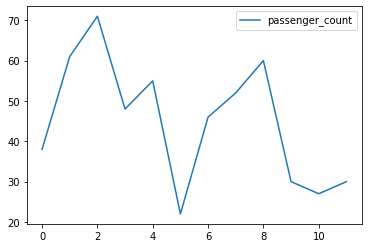

In [56]:
out.plot()

In [53]:
out

,passenger_count
datetime,
2020-07-12 09:00:00,38
2020-07-12 10:00:00,61
2020-07-12 11:00:00,71
2020-07-12 12:00:00,48
2020-07-12 13:00:00,55
2020-07-12 14:00:00,22
2020-07-12 15:00:00,46
2020-07-12 16:00:00,52
2020-07-12 17:00:00,60


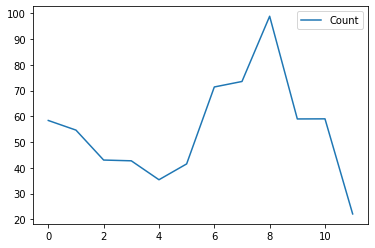

In [75]:
scan_data0713 = pd.read_csv('validation-scans_raw-2020-07-13.csv')
scan_data0713.head()

,Scan Timestamp,Ticket Type,Ticket Number,Origin ID,Origin Name,Destination ID,Destination Name,Expiry Time,Vehicle ID
0,7/6/2020 8:32,One Way Intermediate,WTTCMCZBXV3,108,Fordham,132,White Plains,1/5/2021 23:59,9611
1,7/10/2020 8:59,One Way Intermediate,WTTDCXRB7V2,58,Poughkeepsie,8,Marble Hill,9/1/2020 23:59,8807
2,7/12/2020 10:41,One Way Off-Peak,WTTC3V3BHVG,234,South Norwalk,1,Grand Central Terminal,9/8/2020 23:59,6521
3,7/12/2020 21:41,One Way Off-Peak,WTTB3NXA7VQ,46,Peekskill,2,Harlem - 125th Street,9/9/2020 23:59,8868
4,7/13/2020 0:07,One Way Intermediate,WTTDGNFA7VU,8,Marble Hill,36,Ossining,9/9/2020 23:59,8776


In [76]:

result =  scan_data0713
result['Scan Timestamp'] = pd.to_datetime(result['Scan Timestamp'])
result.head()

,Scan Timestamp,Ticket Type,Ticket Number,Origin ID,Origin Name,Destination ID,Destination Name,Expiry Time,Vehicle ID
0,2020-07-06 08:32:00,One Way Intermediate,WTTCMCZBXV3,108,Fordham,132,White Plains,1/5/2021 23:59,9611
1,2020-07-10 08:59:00,One Way Intermediate,WTTDCXRB7V2,58,Poughkeepsie,8,Marble Hill,9/1/2020 23:59,8807
2,2020-07-12 10:41:00,One Way Off-Peak,WTTC3V3BHVG,234,South Norwalk,1,Grand Central Terminal,9/8/2020 23:59,6521
3,2020-07-12 21:41:00,One Way Off-Peak,WTTB3NXA7VQ,46,Peekskill,2,Harlem - 125th Street,9/9/2020 23:59,8868
4,2020-07-13 00:07:00,One Way Intermediate,WTTDGNFA7VU,8,Marble Hill,36,Ossining,9/9/2020 23:59,8776


In [77]:
result_group = result.groupby(['Origin Name','Ticket Type' ,pd.Grouper(key='Scan Timestamp', freq='60min')])['Ticket Number'].apply(set).reset_index()

In [78]:
result_group['passenger_count'] = result_group['Ticket Number'].str.len()

In [79]:
result_group = result_group.drop(columns  = ["Ticket Type","Ticket Number"])

In [80]:
result_group['datetime'] = pd.to_datetime(result_group['Scan Timestamp'])
df = result_group[(result_group["Origin Name"] == 'Grand Central Terminal')][['datetime','passenger_count']]


In [81]:
df = df.groupby('datetime').agg({'passenger_count':'sum'})

In [82]:
df.reset_index(inplace=True)

In [83]:
df = df.loc[(df.datetime >='2020-07-13 09:00:00' ) & (df.datetime <='2020-07-13 20:00:00' ) ]

In [84]:
df.set_index('datetime',inplace=True)

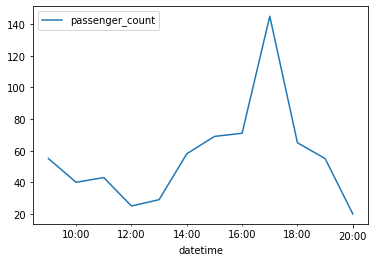

In [86]:
df.plot()


In [93]:

pred_data.dtypes

Count    float64
Time      object
dtype: object

In [94]:

pred_data['Time'] = pd.to_datetime(pred_data['Time'])


Count           float64
Time     datetime64[ns]
dtype: object

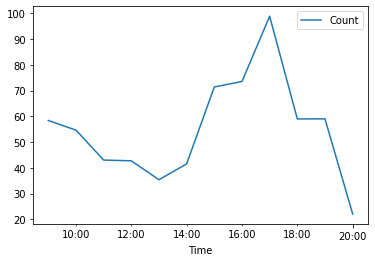

In [95]:
pred_data.set_index('Time', inplace=True)

In [96]:
df['pred_count'] = pred_data['Count']
df.head()

,passenger_count,pred_count
datetime,,
2020-07-13 09:00:00,55,58.393571
2020-07-13 10:00:00,40,54.654205
2020-07-13 11:00:00,43,43.037579
2020-07-13 12:00:00,25,42.740546
2020-07-13 13:00:00,29,35.394296


Text(0.5, 1.0, 'Passenger Prediction at Grand Central Station on 7/13/2020')

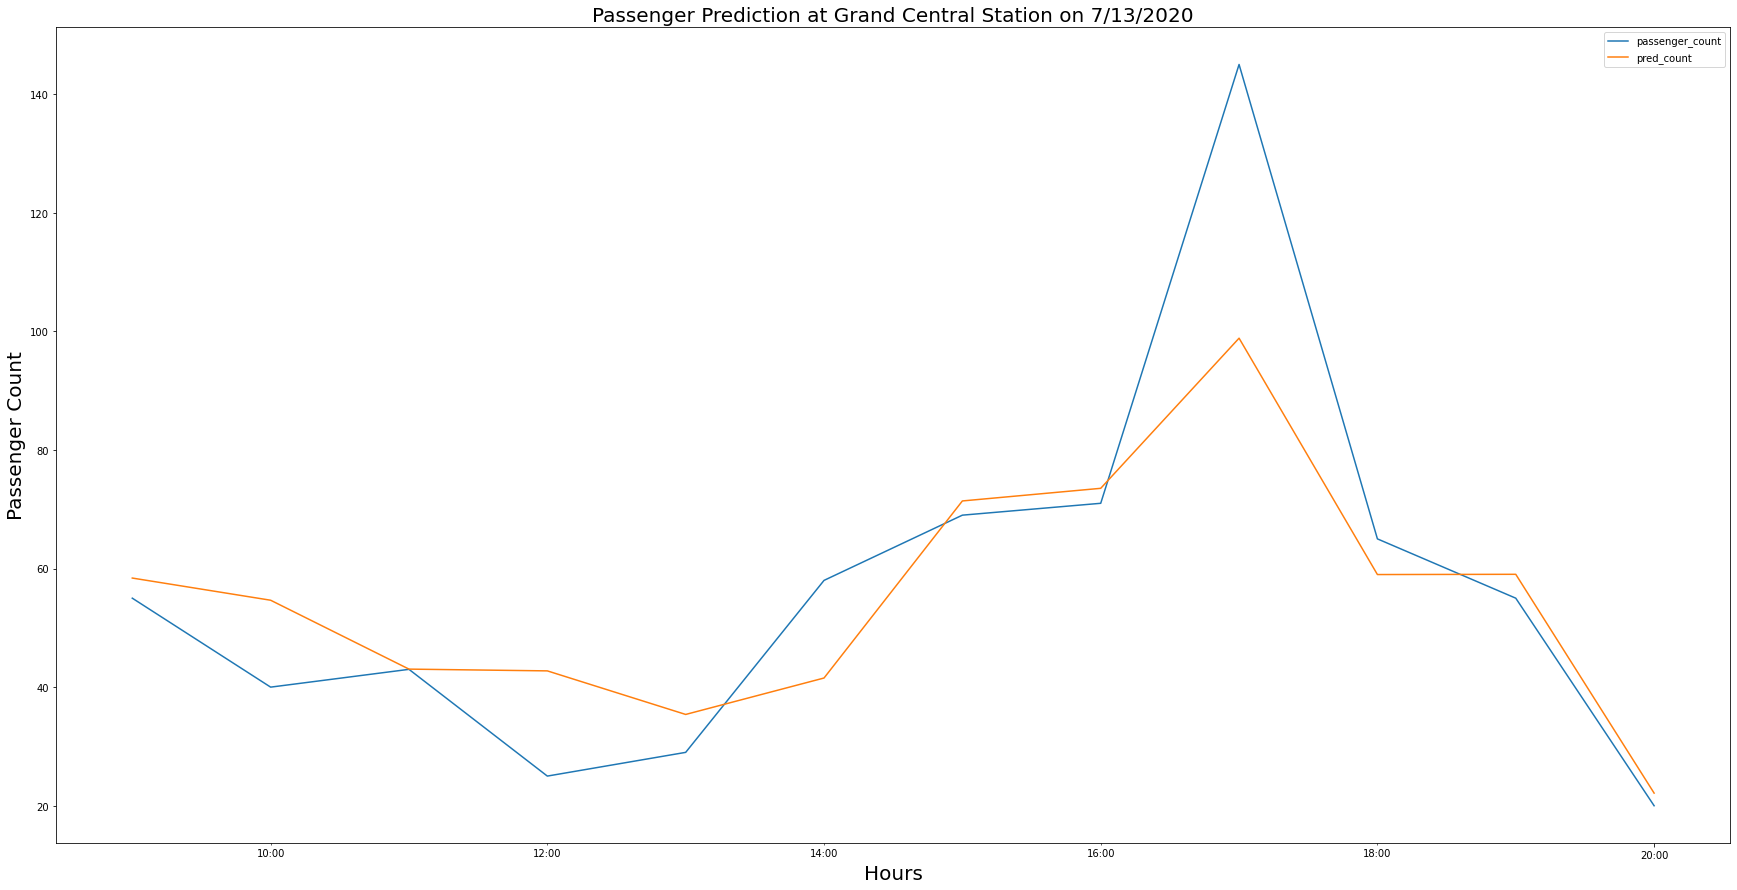

In [102]:
ax =df.plot(figsize=(30, 15))
ax.set_xlabel('Hours', size=20)
ax.set_ylabel('Passenger Count', size =20)
ax.set_title("Passenger Prediction at Grand Central Station on 7/13/2020", size= 20)

In [104]:
fig = ax.get_figure()
fig.savefig("pred_graph.png")

**Requests to API endpoint for the model deployed in Microsoft Azure**

In [ ]:

# URL for the web service
scoring_uri = 'http://dcba10cc-10a6-46df-a2ae-5285d2d8b8bc.eastus2.azurecontainer.io/score'


# Two sets of data to score, so we get two results back
data = {"data":[['2020-07-13']]}
# Convert to JSON string
input_data = json.dumps(data)

# Set the content type
headers = {'Content-Type': 'application/json'}
# If authentication is enabled, set the authorization header
# headers['Authorization'] = f'Bearer {key}'

# Make the request and display the response
resp = requests.post(scoring_uri, input_data, headers=headers)
# print(resp.text)